# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

## Distribution and Outliers

### Download speed range

#### For national data

In [31]:
rango_velocidad_nacional_unpivot = pd.read_csv("../processed_data/rango_velocidad_nacional_unpivot.csv")
rango_velocidad_nacional_unpivot.head()

,Año,Trimestre,Rango Velocidad,Accesos
0,2022,3,Hasta 512 kbps,33013
1,2022,2,Hasta 512 kbps,33667
2,2022,1,Hasta 512 kbps,34890
3,2021,4,Hasta 512 kbps,41262
4,2021,3,Hasta 512 kbps,40174


In [32]:
rango_velocidad_nacional_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              280 non-null    int64 
 1   Trimestre        280 non-null    int64 
 2   Rango Velocidad  280 non-null    object
 3   Accesos          280 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.9+ KB


In [33]:
rango_velocidad_nacional_unpivot.isna().mean()

Año                0.0
Trimestre          0.0
Rango Velocidad    0.0
Accesos            0.0
dtype: float64

In [34]:
rango_velocidad_nacional_unpivot.describe()

,Año,Trimestre,Accesos
count,280.000000,280.000000,2.800000e+02
mean,2017.885714,2.457143,1.031966e+06
std,2.531764,1.106329,1.493611e+06
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,1.000000,4.364125e+04
50%,2018.000000,2.000000,4.500840e+05
75%,2020.000000,3.000000,1.084152e+06
max,2022.000000,4.000000,6.995750e+06


In [45]:
rango_velocidad_nacional_unpivot.groupby(['Año', 'Trimestre'])['Accesos'].describe()

count         mean           std       min        25%  \
Año  Trimestre                                                          
2014 1            8.0   784105.750  1.771639e+06       0.0    8782.50   
     2            8.0   793593.125  1.774862e+06       0.0    9313.75   
     3            8.0   795958.875  1.774158e+06       0.0    9444.75   
     4            8.0   809435.625  1.742074e+06       0.0   12514.50   
2015 1            8.0   827901.500  1.751031e+06       0.0   14171.00   
     2            8.0   848263.125  1.752681e+06       0.0   16408.00   
     3            8.0   856623.500  1.732360e+06       0.0   18783.00   
     4            8.0   864595.750  1.717131e+06       0.0   21019.50   
2016 1            8.0   854410.625  1.680413e+06       0.0   26593.00   
     2            8.0   896558.000  1.714068e+06       0.0   40261.00   
     3            8.0   892740.625  1.632017e+06       0.0   28292.50   
     4            8.0   893087.000  1.584069e+06       0.0   34123.50   
2017 1            8.0   899877.250  1.552296e+06       0.0   41155.75   
     2            8.0   915464.625  1.497242e+06       0.0   79567.75   
     3            8.0   944203.625  1.376733e+06       0.0  168253.25   
     4            8.0   983777.750  1.258461e+06   15041.0  204891.75   
2018 1            8.0  1004631.625  1.125785e+06    7309.0  231289.50   
     2            8.0  1013805.500  1.113123e+06    5972.0  233708.00   
     3            8.0  1043379.375  1.133882e+06    5675.0  204560.50   
     4            8.0  1059206.875  1.095989e+06  138740.0  188994.00   
2019 1            8.0  1081016.875  1.086234e+06  126570.0  188422.75   
     2            8.0  1120022.625  1.098439e+06   95980.0  236684.75   
     3            8.0  1145585.500  1.130257e+06   80599.0  243028.50   
     4            8.0  1099147.625  1.134878e+06   28980.0  160352.50   
2020 1            8.0  1101553.250  1.287538e+06   42550.0  159701.50   
     2            8.0  1128882.000  1.346313e+06   41038.0  157678.50   
     3            8.0  1169524.875  1.439354e+06   41038.0  162334.00   
     4            8.0  1196445.250  1.490267e+06   39510.0  149372.75   
2021 1            8.0  1205996.500  1.528930e+06   39487.0  150516.25   
     2            8.0  1232885.500  1.606819e+06   40172.0  136032.75   
     3            8.0  1260692.625  1.702770e+06   40174.0  132811.00   
     4            8.0  1311224.250  1.981633e+06   28521.0  156003.75   
2022 1            8.0  1328001.125  2.082032e+06   34890.0  174959.75   
     2            8.0  1369835.500  2.216888e+06   33667.0  288570.00   
     3            8.0  1386391.000  2.307757e+06   33013.0  285958.00   

                      50%         75%        max  
Año  Trimestre                                    
2014 1            76905.5   388791.25  5130294.0  
     2            94168.5   420368.75  5149574.0  
     3           109956.5   432033.50  5153437.0  
     4           160164.5   510875.50  5084556.0  
2015 1           194630.0   530594.25  5121423.0  
     2           236742.5   536491.25  5138431.0  
     3           245403.5   579857.25  5087802.0  
     4           230818.5   660943.25  5049640.0  
2016 1           217619.0   671984.25  4944358.0  
     2           229099.0   788568.75  5058481.0  
     3           209488.5   923539.25  4816081.0  
     4           201460.0   987827.75  4673339.0  
2017 1           220413.5  1013767.00  4584534.0  
     2           227185.0  1078210.75  4416065.0  
     3           299635.0  1195183.50  4062226.0  
     4           484752.5  1186747.00  3773159.0  
2018 1           629993.5  1249738.75  3272724.0  
     2           711903.5  1226486.75  3316868.0  
     3           692095.0  1580553.25  3401277.0  
     4           740983.5  1526662.50  3337982.0  
2019 1          1010782.0  1299348.25  3428759.0  
     2          1020387.0  1357232.00  3444458.0  
     3           916662.5  1434883.25  3309137.0  
     4           927851.0  1482672.75  

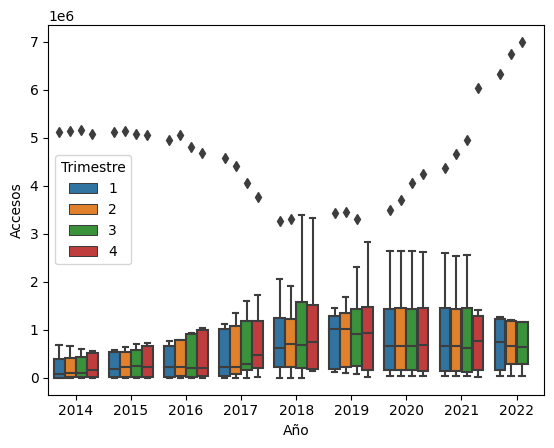

In [41]:

sns.boxplot(data=rango_velocidad_nacional_unpivot, x='Año', y='Accesos', hue='Trimestre')
plt.show()


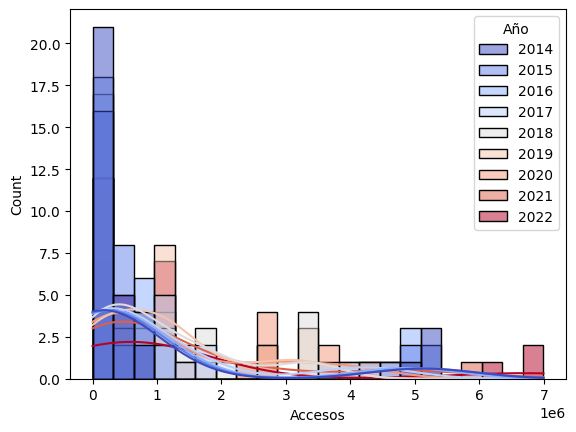

In [44]:
sns.histplot(data=rango_velocidad_nacional_unpivot, x='Accesos', hue='Año', kde=True, palette="coolwarm")
plt.show()


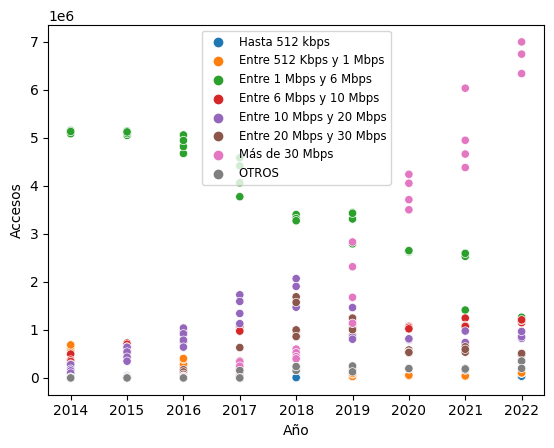

In [82]:
sns.scatterplot(data=rango_velocidad_nacional_unpivot, x='Año', y='Accesos', hue='Rango Velocidad')
plt.legend(fontsize='small')  # Establece un tamaño de fuente pequeño para la leyenda
plt.show()

In [70]:
rango_velocidad_regional_unpivot = pd.read_csv("../processed_data/rango_velocidad_regional_unpivot.csv")
rango_velocidad_regional_unpivot.head()

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
0,2022,3,Buenos Aires,HASTA 512 kbps,29985
1,2022,3,Capital Federal,HASTA 512 kbps,517
2,2022,3,Catamarca,HASTA 512 kbps,71
3,2022,3,Chaco,HASTA 512 kbps,461
4,2022,3,Chubut,HASTA 512 kbps,109


In [71]:
rango_velocidad_regional_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              6714 non-null   int64 
 1   Trimestre        6714 non-null   int64 
 2   Provincia        6714 non-null   object
 3   Rango Velocidad  6714 non-null   object
 4   Accesos          6714 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 262.4+ KB


In [72]:
rango_velocidad_regional_unpivot.isna().mean()

Año                0.0
Trimestre          0.0
Provincia          0.0
Rango Velocidad    0.0
Accesos            0.0
dtype: float64

In [73]:
rango_velocidad_regional_unpivot.describe()

,Año,Trimestre,Accesos
count,6714.000000,6714.000000,6.714000e+03
mean,2017.884718,2.457551,4.303703e+04
std,2.528337,1.104842,1.856786e+05
min,2014.000000,1.000000,-1.945000e+03
25%,2016.000000,1.000000,6.700000e+01
50%,2018.000000,2.000000,3.376000e+03
75%,2020.000000,3.000000,2.312500e+04
max,2022.000000,4.000000,3.618689e+06


In [74]:
rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot["Accesos"] < 0]

,Año,Trimestre,Provincia,Rango Velocidad,Accesos
6035,2021,1,La Rioja,OTROS,-1
6043,2021,1,Santa Cruz,OTROS,-1945


In [23]:
rango_velocidad_regional_unpivot.groupby(['Año', 'Rango Velocidad'])['Accesos'].sum()

Año   Rango Velocidad    
2014  + 1 Mbps - 6 Mbps      20517861
      + 10 Mbps - 20 Mbps      707137
      + 20 Mbps - 30 Mbps        5701
      + 30 Mbps                 51507
      + 512 Kbps - 1 Mbps     2506794
                               ...   
2022  + 30 Mbps              20073859
      + 512 Kbps - 1 Mbps      301065
      + 6 Mbps - 10 Mbps      3558084
      HASTA 512 kbps           101570
      OTROS                    898962
Name: Accesos, Length: 72, dtype: int64

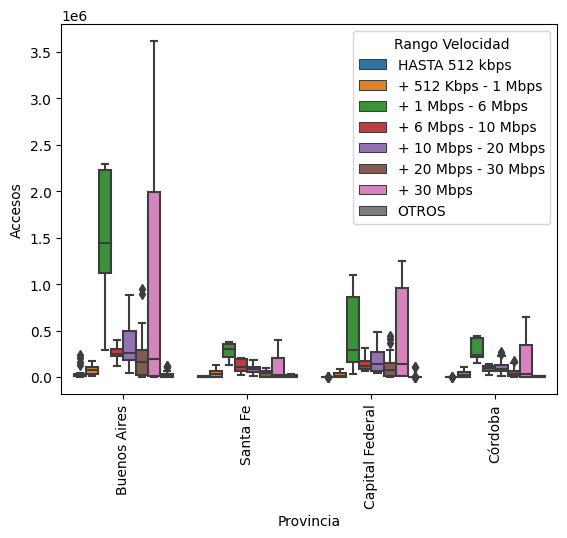

In [80]:

umbral_accesos = 300000  # Definir el umbral de accesos deseado

provincias_filtradas = rango_velocidad_regional_unpivot[rango_velocidad_regional_unpivot['Accesos'] > umbral_accesos]["Provincia"].unique()

sns.boxplot(data=rango_velocidad_regional_unpivot, x='Provincia', y='Accesos', hue="Rango Velocidad",order=provincias_filtradas)
plt.xticks(rotation=90)
plt.show()


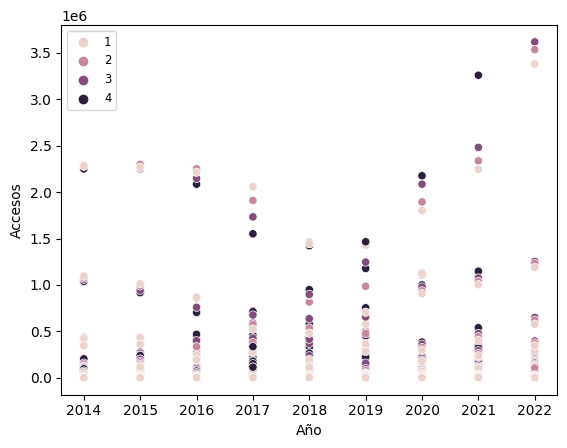

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rango_velocidad_regional_unpivot, x='Año', y='Accesos', hue='Trimestre')
plt.legend(fontsize='small')  # Establece un tamaño de fuente pequeño para la leyenda
plt.show()


In [2]:
general_nacional= pd.read_csv("../processed_data/general_nacional.csv")

c:\Users\ASUS X515\Documents\Programacion_Data\proyectos\argentinian-telecommunications-analysis\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


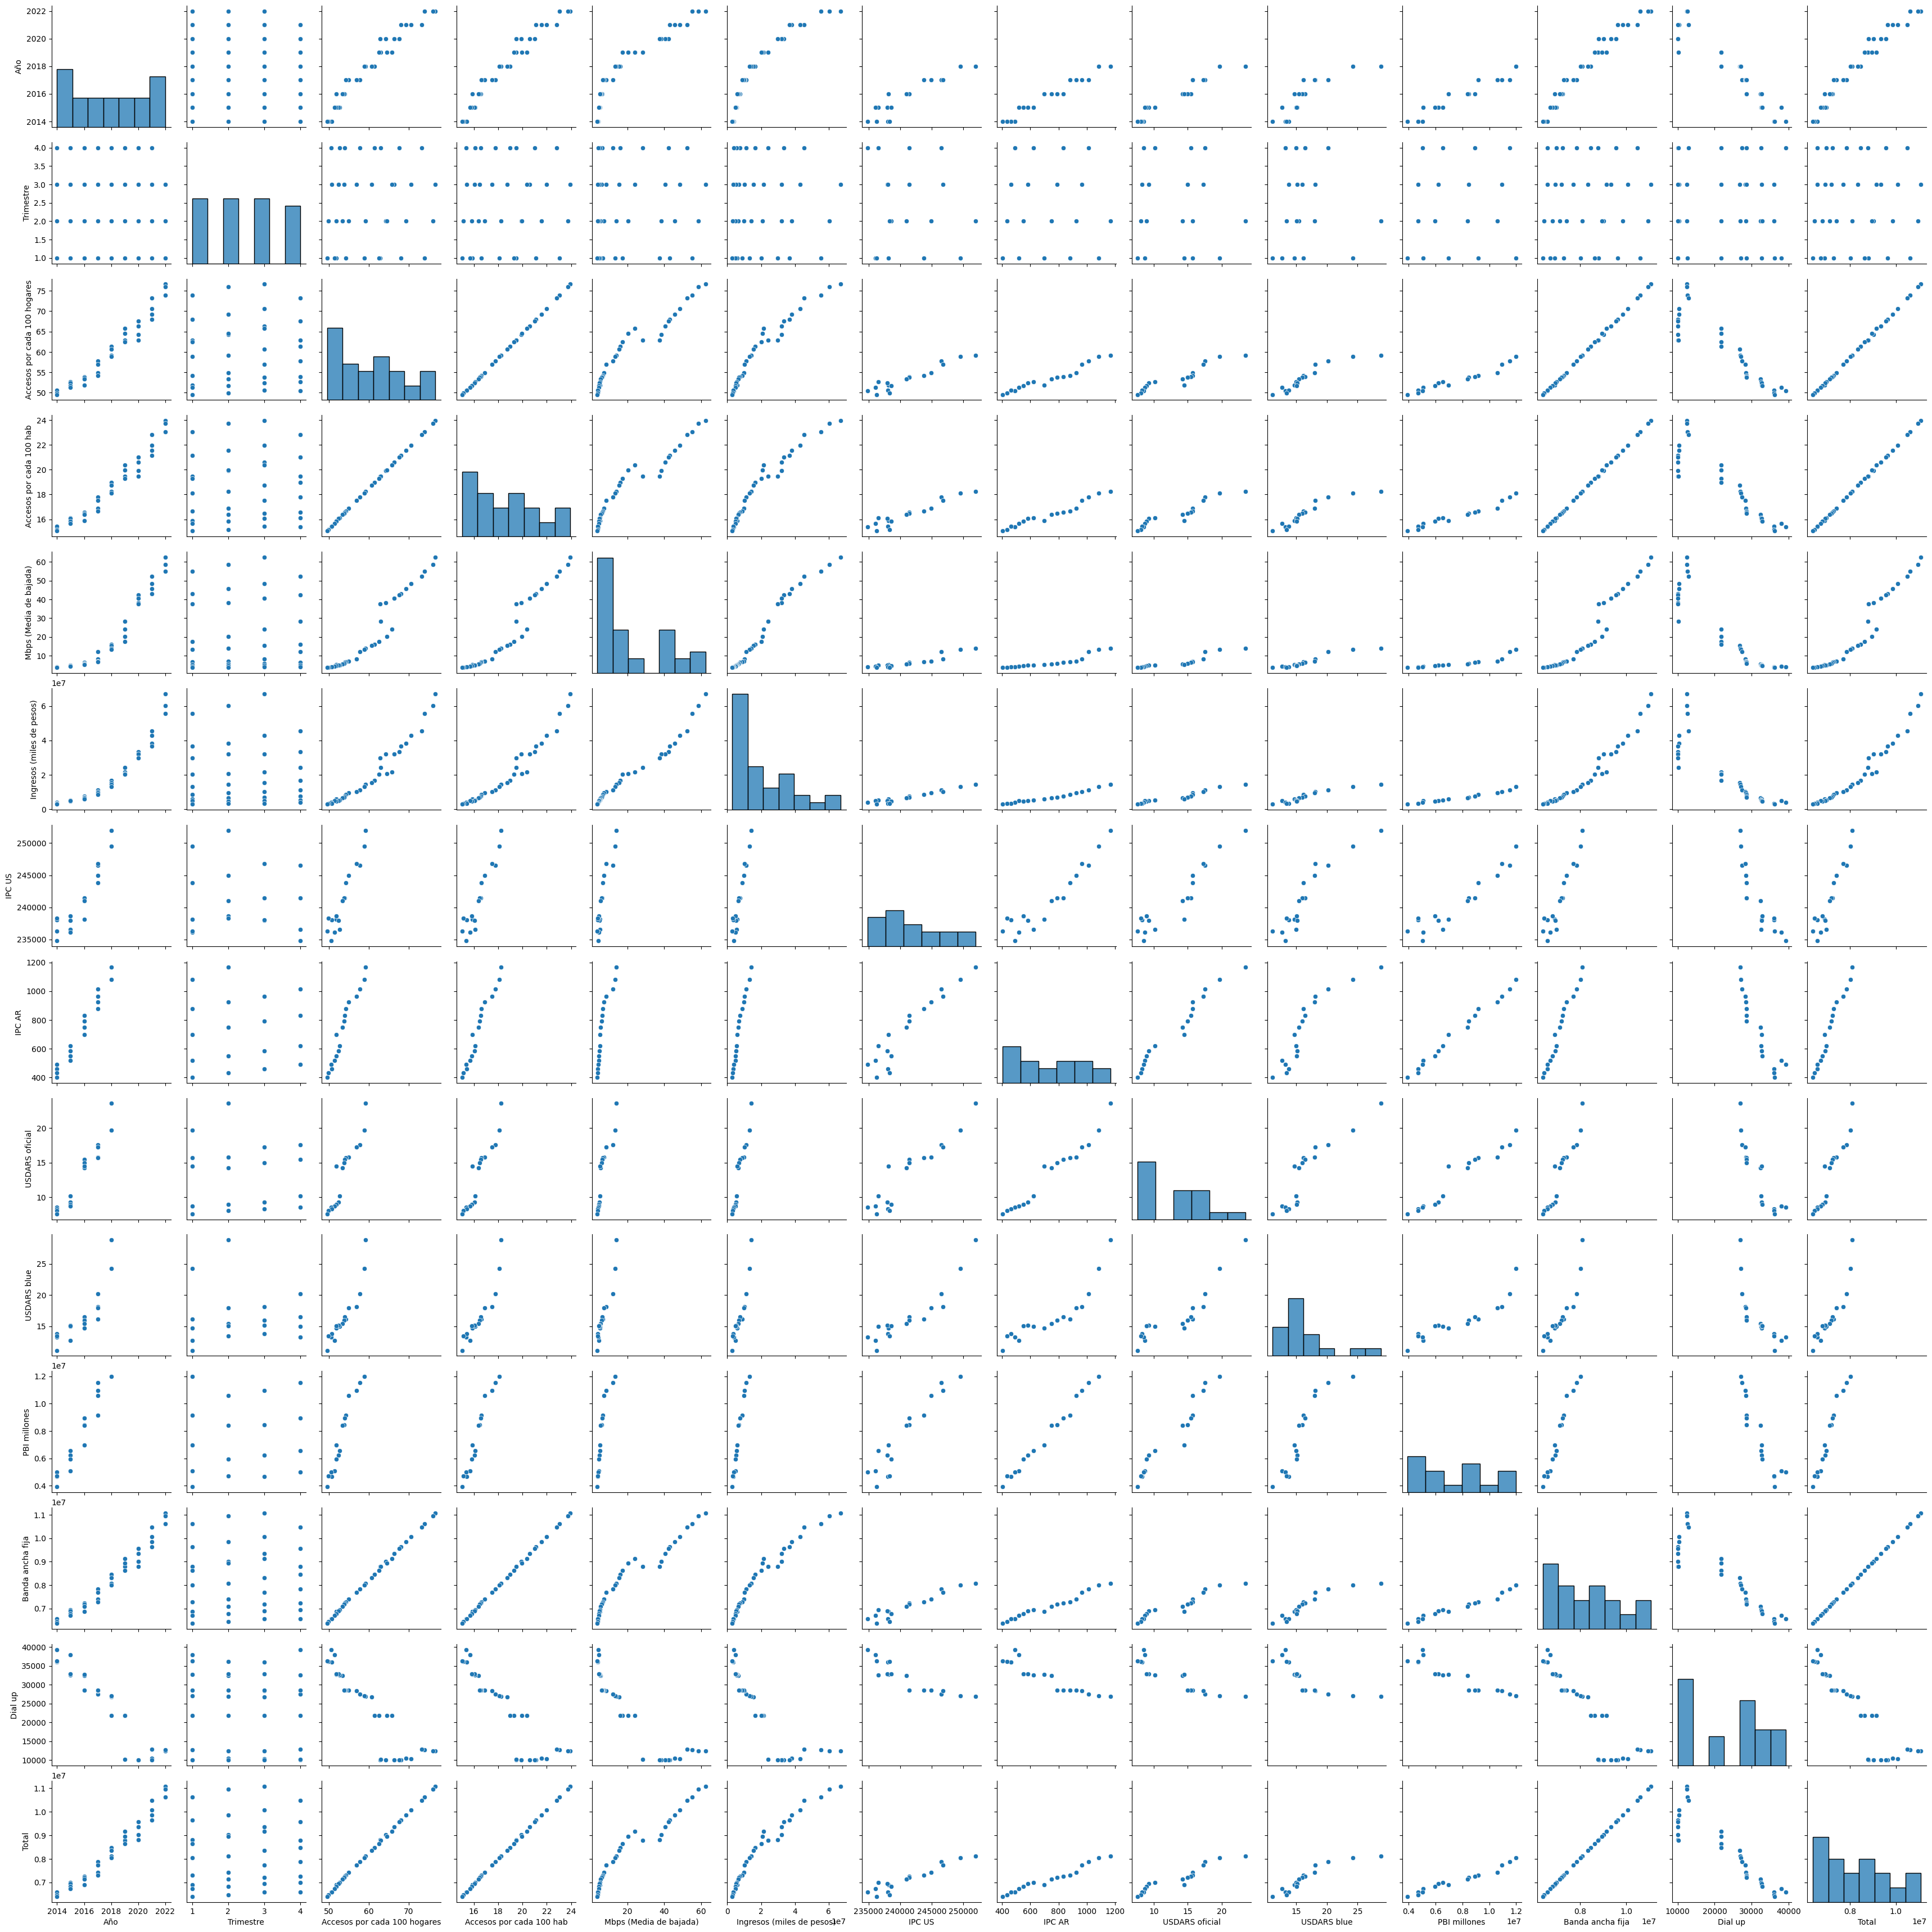

In [3]:
sns.pairplot(data=general_nacional)